<h1>UK ROAD ACCIDENTS DATA ANALYSIS</h1>
<hr>
<h2>Inclusive Year: 2019-2022</h2>
<h3>Analyst: Maria Louizza B. Pajarillon</h3>

In [1]:
!pip install pandas numpy scipy matplotlib seaborn plotly

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from scipy import stats

#for visualization
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

<h1>Converting CSV file into a Pandas DataFrame</h1>

In [3]:
accident = pd.read_csv('datasets\\uk_road_accident.csv')
accident

,Index,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Checking and Filling the Missing Values</h1>

In [4]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident_Date                  0
Latitude                      25
Light_Conditions               0
District_Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [5]:
#For Categorical Datas [.mode()]
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])

#For large number of missing values
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown road condition')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')

accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [6]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident_Date              0
Latitude                   0
Light_Conditions           0
District_Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Extracting Date Information (using pandas date time)</h1>

In [7]:
accident['Accident_Date'] = accident['Accident_Date'].astype('str')
accident['Accident_Date'] = accident['Accident_Date'].str.strip()
accident['Accident_Date'] = accident['Accident_Date'].str.replace('/', '-')

In [8]:
accident['Accident_Date'] = pd.to_datetime(accident['Accident_Date'], dayfirst = True, errors = 'coerce') 


In [9]:
accident['Year'] = accident['Accident_Date'].dt.year
accident['Month'] = accident['Accident_Date'].dt.month
accident['Day'] = accident['Accident_Date'].dt.day
accident['DayofWeek'] = accident['Accident_Date'].dt.dayofweek
accident['Accident_Date'].value_counts()

Accident_Date
2019-11-30    704
2019-01-31    697
2019-07-13    692
2021-11-13    692
2019-08-14    688
             ... 
2022-12-30    171
2019-12-25    157
2022-12-25    145
2022-01-10    123
2020-12-25    118
Name: count, Length: 1461, dtype: int64

<h1>Changing Data Types</h1>

In [10]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident_Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District_Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
Year                                int32
Month                               int32
Day                                 int32
DayofWeek                           int32
dtype: object

In [11]:
accident['Index'] = accident['Index'].astype('category')
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District_Area'] = accident['District_Area'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident_Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District_Area            660679 non-null  category      
 6   Longitude                660679 non-null  category      
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

In [12]:
accident.describe(include='all')

,Index,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayofWeek
count,660679,660679,660679,660679.000000,660679,660679,660679.000000,660679.000000,660679.000000,660679,660679,660679,660679,660679,660679.000000,660679.000000,660679.000000,660679.000000
unique,421020,3,NaN,511618.000000,5,422,529766.000000,NaN,NaN,6,6,3,9,16,NaN,NaN,NaN,NaN
top,2.01E+12,Slight,NaN,52.458798,Daylight,Birmingham,-0.977611,NaN,NaN,Dry,Single carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN
freq,239478,563801,NaN,75.000000,484880,13491,71.000000,NaN,NaN,447821,492143,421678,520885,497992,NaN,NaN,NaN,NaN
mean,NaN,NaN,2020-11-30 08:30:32.761749760,NaN,NaN,NaN,NaN,1.357040,1.831255,NaN,NaN,NaN,NaN,NaN,2020.409090,6.607965,15.581350,3.111195
min,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,2019.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,2019-11-27 00:00:00,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,2019.000000,4.000000,8.000000,1.000000
50%,NaN,NaN,2020-11-13 00:00:00,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,2020.000000,7.000000,16.000000,3.000000
75%,NaN,NaN,2021-11-17 00:00:00,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,2021.000000,10.000000,23.000000,5.000000
max,NaN,NaN,2022-12-31 00:00:00,NaN,NaN,NaN,NaN,68.000000,32.000000,NaN,NaN,NaN,NaN,NaN,2022.000000,12.000000,31.000000,6.000000


In [13]:
accident

,Index,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayofWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


In [14]:
accident.shape

(660679, 18)

<h1>Questions & Insights</h1>
<hr>

<h1>1. Which year between 2019 to 2022 recorded the highest number of accidents? </h1>

In [15]:
overall_acc = accident['Year'].value_counts()
overall_acc

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

<Axes: title={'center': 'Number of Accidents per Year (2019–2022)'}, xlabel='Year', ylabel='Number of Accidents'>

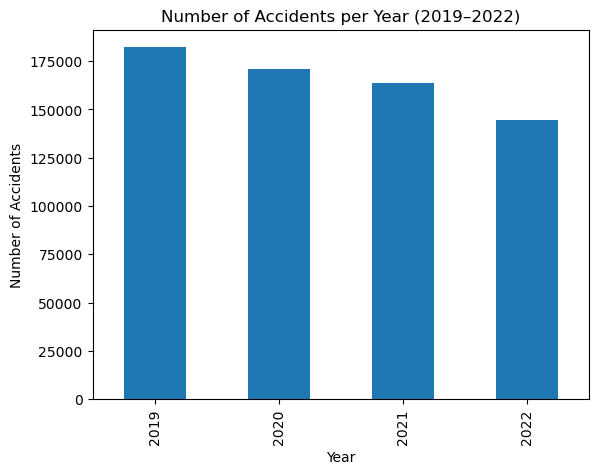

In [16]:
overall_acc.plot(kind='bar', title='Number of Accidents per Year (2019–2022)', xlabel='Year', ylabel='Number of Accidents')

<h2>Insight 1: The highest number of recorded accidents occurred in 2019, followed by a continuous decline in subsequent years.</h2>

<h2>Insight 2: The most significant decline occurred between 2021 and 2022, with over 19,000 fewer accidents recorded.</h2>

<h1>2. Which months have the highest number of accidents?</h1>

In [17]:
accident['Month'] = accident['Accident_Date'].dt.month 
monthly_counts = accident.groupby('Month').size()
monthly_counts

Month
1     52872
2     49491
3     54086
4     51744
5     56352
6     56481
7     57445
8     53913
9     56455
10    59580
11    60424
12    51836
dtype: int64

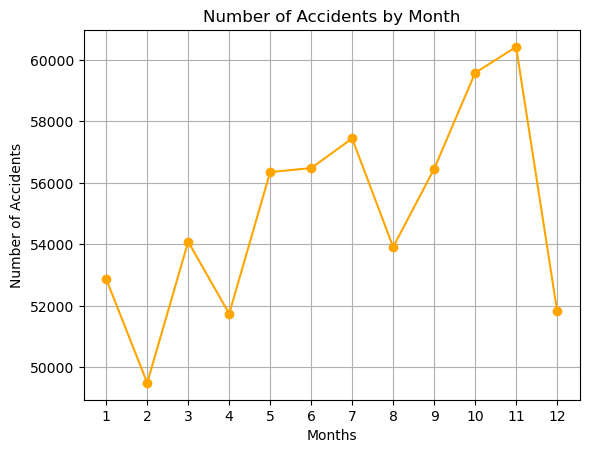

In [18]:
monthly_counts.plot(kind='line', marker='o', linestyle='-', color='orange')
plt.title('Number of Accidents by Month')
plt.xlabel('Months')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(range(1,13))
plt.show()

<h2>Insight 3: November recorded the highest number of accidents, followed closely by October.</h2>

<h2>Insight 4: February had the lowest number of accidents, which may be influenced by the shorter number of days and reduced road activity during winter</h2>

<h1>3. Which district has the highest and lowest accident severity? </h1>

In [19]:
severity_counts = accident.groupby(['District_Area', 'Accident_Severity']).size().unstack()
severity_counts

C:\Users\Ria\AppData\Local\Temp\ipykernel_8688\973436500.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_counts = accident.groupby(['District_Area', 'Accident_Severity']).size().unstack()


Accident_Severity,Fatal,Serious,Slight
District_Area,,,
Aberdeen City,12,239,1072
Aberdeenshire,66,463,1401
Adur,8,101,510
Allerdale,24,143,961
Alnwick,6,33,193
...,...,...,...
Wychavon,30,193,1138
Wycombe,20,216,1493
Wyre,15,186,1037


In [20]:
#for highest

severity_counts['Total'] = severity_counts.sum(axis=1)
top_severity = severity_counts.sort_values(by='Total', ascending=False)

top_severity


Accident_Severity,Fatal,Serious,Slight,Total
District_Area,,,,
Birmingham,105,1474,11912,13491
Leeds,93,1147,7658,8898
Manchester,49,666,6005,6720
Bradford,71,802,5339,6212
Sheffield,38,749,4923,5710
...,...,...,...,...
Berwick-upon-Tweed,3,29,121,153
Teesdale,3,29,110,142
Shetland Islands,5,15,113,133


<h2>Insight 5: Among the top 5 districts with the highest accident counts, Birmingham leads with the most accidents across all severity levels, while Sheffield ranks fifth.</h2>

In [21]:
#for lowest nseverity counts
severity_counts['Total'] = severity_counts.sum(axis=1)
lowest_total = severity_counts.sort_values(by='Total', ascending=True)

lowest_total

Accident_Severity,Fatal,Serious,Slight,Total
District_Area,,,,
Clackmannanshire,1,18,72,182
Orkney Islands,2,19,96,234
Shetland Islands,5,15,113,266
Teesdale,3,29,110,284
Berwick-upon-Tweed,3,29,121,306
...,...,...,...,...
Sheffield,38,749,4923,11420
Bradford,71,802,5339,12424
Manchester,49,666,6005,13440


<h2>Insight 6: The districts with the lowest accident counts are mostly rural areas, with Clackmannanshire having the fewest total accidents and Berwick-upon-Tweed the highest among the bottom five.</h2>

<h1>4. How does accident frequency vary across days of the week?</h1>

In [22]:
days = accident.groupby("DayofWeek").size()
days

DayofWeek
0     72680
1     94550
2     99558
3     99511
4     97900
5    107178
6     89302
dtype: int64

In [23]:
#extract daysofweek to day name instead of 0-6
accident['Days of the Week'] = accident['Accident_Date'].dt.day_name()
day_counts = accident['Days of the Week'].value_counts()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(days_order)

day_counts

Days of the Week
Monday        72680
Tuesday       94550
Wednesday     99558
Thursday      99511
Friday        97900
Saturday     107178
Sunday        89302
Name: count, dtype: int64

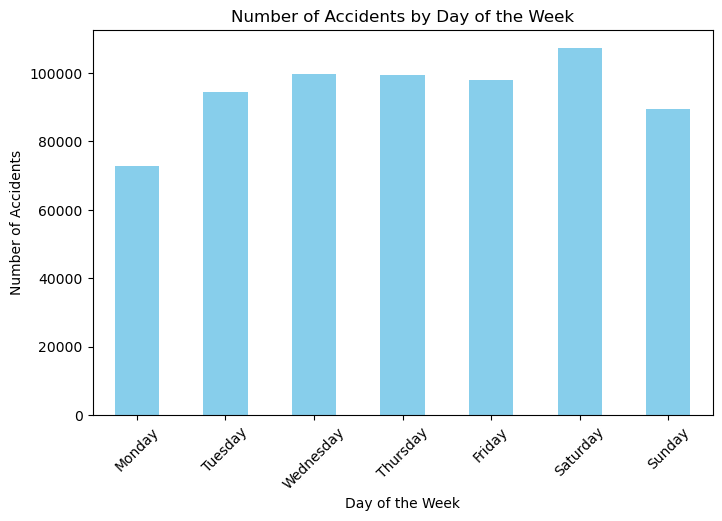

In [24]:
#visualoization
plt.figure(figsize=(8,5))
day_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


<h2>Insight 7: Saturday has the highest number of accidents, indicating increased risk during weekends.</h2>

<h2>Insight 8: Monday has the lowest accident count, suggesting fewer incidents at the start of the week.</h2>

<h1>5. What are the most common road surface conditions based on the severity accidents?</h1>

In [25]:
fatal_conditions = accident[accident['Accident_Severity'] == 'Fatal']['Road_Surface_Conditions'].value_counts()
fatal_conditions

Road_Surface_Conditions
Dry                       5788
Wet or damp               2620
Frost or ice               193
Snow                        35
Flood over 3cm. deep        23
unknown road condition       2
Name: count, dtype: int64

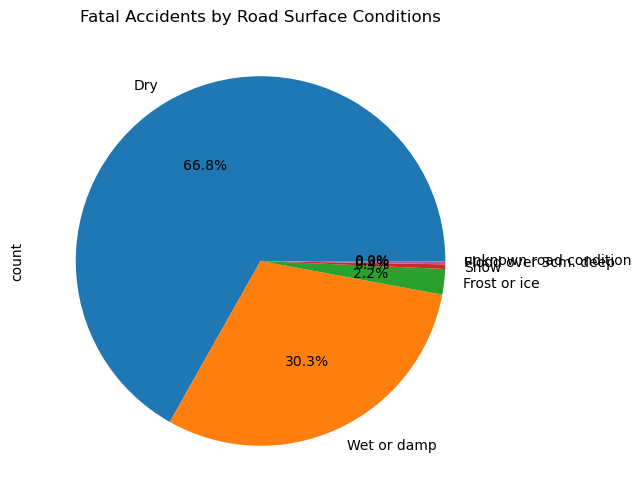

In [26]:
plt.figure(figsize=(6,6))
fatal_conditions.plot(kind='pie', autopct='%1.1f%%')

plt.title("Fatal Accidents by Road Surface Conditions")
plt.show()

<h2>Insight 9: The majority of fatal accidents occurred on dry road surfaces, accounting for approximately 66.8% of cases.</h2>

In [27]:
serious_conditions = accident[accident['Accident_Severity'] == 'Serious']['Road_Surface_Conditions'].value_counts()
fatal_conditions

Road_Surface_Conditions
Dry                       5788
Wet or damp               2620
Frost or ice               193
Snow                        35
Flood over 3cm. deep        23
unknown road condition       2
Name: count, dtype: int64

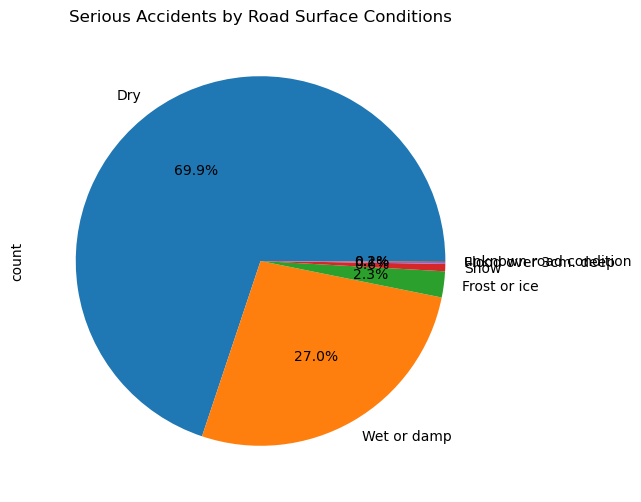

In [28]:
plt.figure(figsize=(6,6))
serious_conditions.plot(kind='pie', autopct='%1.1f%%')

plt.title("Serious Accidents by Road Surface Conditions")
plt.show()

<h2>Insight 10: The majority of serioud accidents occurred on dry road surfaces, accounting for approximately 69.9% of cases.</h2>

In [29]:
slight_conditions = accident[accident['Accident_Severity'] == 'Slight']['Road_Surface_Conditions'].value_counts()
slight_conditions

Road_Surface_Conditions
Dry                       380395
Wet or damp               160303
Frost or ice               16317
Snow                        5290
Flood over 3cm. deep         842
unknown road condition       654
Name: count, dtype: int64

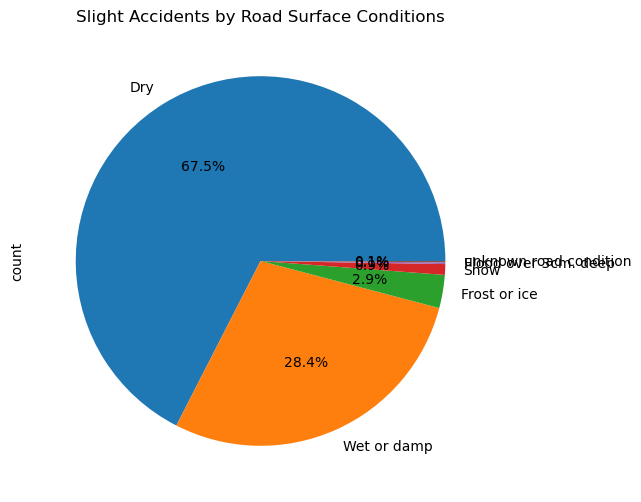

In [30]:
plt.figure(figsize=(6,6))
slight_conditions.plot(kind='pie', autopct='%1.1f%%')

plt.title("Slight Accidents by Road Surface Conditions")
plt.show()

<h2>Insight 11: The majority of fatal accidents occurred on dry road surfaces, accounting for approximately 67.5% of cases.</h2>

<h1>6. Which vehicle type is most often involved in accidents in both rural and urban areas?</h1>

In [31]:
vehicle_area_counts = accident.groupby(["Vehicle_Type", "Urban_or_Rural_Area"]).size()
vehicle_area_counts


C:\Users\Ria\AppData\Local\Temp\ipykernel_8688\2899712982.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle_area_counts = accident.groupby(["Vehicle_Type", "Urban_or_Rural_Area"]).size()


Vehicle_Type                           Urban_or_Rural_Area
Agricultural vehicle                   Rural                     675
                                       Unallocated                 0
                                       Urban                    1272
Bus or coach (17 or more pass seats)   Rural                    9025
                                       Unallocated                 2
                                       Urban                   16851
Car                                    Rural                  181922
                                       Unallocated                 8
                                       Urban                  316062
Data missing or out of range           Rural                       0
                                       Unallocated                 0
                                       Urban                       6
Goods 7.5 tonnes mgw and over          Rural                    6156
                                       Unall

In [32]:
vehicle_area_counts = accident.groupby(["Vehicle_Type", "Urban_or_Rural_Area"]).size().unstack()
vehicle_area_counts

C:\Users\Ria\AppData\Local\Temp\ipykernel_8688\4110913880.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle_area_counts = accident.groupby(["Vehicle_Type", "Urban_or_Rural_Area"]).size().unstack()


Urban_or_Rural_Area,Rural,Unallocated,Urban
Vehicle_Type,,,
Agricultural vehicle,675,0,1272
Bus or coach (17 or more pass seats),9025,2,16851
Car,181922,8,316062
Data missing or out of range,0,0,6
Goods 7.5 tonnes mgw and over,6156,0,11151
Goods over 3.5t. and under 7.5t,2232,0,3864
Minibus (8 - 16 passenger seats),718,0,1258
Motorcycle 125cc and under,5023,0,10246
Motorcycle 50cc and under,2710,0,4893


In [33]:
top_urban = vehicle_area_counts["Urban"].sort_values(ascending=False)
top_urban


Vehicle_Type
Car                                      316062
Van / Goods 3.5 tonnes mgw or under       22003
Bus or coach (17 or more pass seats)      16851
Motorcycle over 500cc                     16700
Goods 7.5 tonnes mgw and over             11151
Motorcycle 125cc and under                10246
Taxi/Private hire car                      8617
Motorcycle over 125cc and up to 500cc      4982
Motorcycle 50cc and under                  4893
Goods over 3.5t. and under 7.5t            3864
Other vehicle                              3643
Agricultural vehicle                       1272
Minibus (8 - 16 passenger seats)           1258
Pedal cycle                                 127
Data missing or out of range                  6
Ridden horse                                  3
Name: Urban, dtype: int64

<h2>Insight 12: Most urban accidents involve cars (316,062 cases), far surpassing all other vehicle types</h2>

In [34]:
top_rural = vehicle_area_counts["Rural"].sort_values(ascending=False)
top_rural

Vehicle_Type
Car                                      181922
Van / Goods 3.5 tonnes mgw or under       12156
Bus or coach (17 or more pass seats)       9025
Motorcycle over 500cc                      8957
Goods 7.5 tonnes mgw and over              6156
Motorcycle 125cc and under                 5023
Taxi/Private hire car                      4677
Motorcycle 50cc and under                  2710
Motorcycle over 125cc and up to 500cc      2674
Goods over 3.5t. and under 7.5t            2232
Other vehicle                              1994
Minibus (8 - 16 passenger seats)            718
Agricultural vehicle                        675
Pedal cycle                                  70
Ridden horse                                  1
Data missing or out of range                  0
Name: Rural, dtype: int64

<h2>Insight 13: Most rural accidents involve cars (181,922 cases), making them by far the leading vehicle type in rural road incidents compared to all others.</h2>

<h1>7. Which combinations of light conditions, weather conditions, and district area have the highest number of accidents?</h1>

In [35]:
combo_counts = (accident.groupby(["Light_Conditions", "Weather_Conditions", "District_Area"]).size().reset_index(name="Accident_Count"))
top_combo = combo_counts.sort_values(by="Accident_Count", ascending=False).head(5)
top_combo


C:\Users\Ria\AppData\Local\Temp\ipykernel_8688\4123501178.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combo_counts = (accident.groupby(["Light_Conditions", "Weather_Conditions", "District_Area"]).size().reset_index(name="Accident_Count"))


,Light_Conditions,Weather_Conditions,District_Area,Accident_Count
15638,Daylight,Fine no high winds,Birmingham,7662
15809,Daylight,Fine no high winds,Leeds,5643
15650,Daylight,Fine no high winds,Bradford,3808
15822,Daylight,Fine no high winds,Manchester,3593
16018,Daylight,Fine no high winds,Westminster,3435


<h2>Insight 14: Under daylight and fine weather conditions, Birmingham recorded the highest number of accidents (7,662), followed by Leeds, Bradford, Manchester, and Westminster, indicating that most incidents occur in favorable driving environments within major urban districts.</h2>

<h1>8. What is the highest number of vehicles involved in an accident occurring on a dry road surface condition?</h1>

In [36]:
dry_accidents = accident[accident["Road_Surface_Conditions"] == "Dry"]
max_vehicles_dry = dry_accidents["Number_of_Vehicles"].max()
max_vehicles_dry

15

<h2>Insight 15: The highest number of vehicles involved in a single accident on a dry road surface was 15.</h2>

<h1>9. What is the fatality rate by weather condition?</h1>

In [37]:
fatal_counts = accident[accident['Accident_Severity'] == 'Fatal']['Weather_Conditions'].value_counts()
total_counts = accident['Weather_Conditions'].value_counts()
fatality_rate = (fatal_counts / total_counts).sort_values(ascending=False)
fatality_rate

Weather_Conditions
Fog or mist              0.023243
Fine + high winds        0.020458
Raining + high winds     0.015081
Fine no high winds       0.013631
Raining no high winds    0.010640
Other                    0.009621
unaccounted              0.007574
Snowing no high winds    0.005771
Snowing + high winds     0.003390
Name: count, dtype: float64

<h2>Insight 16: The fatality rate is highest during fog or mist conditions, suggesting reduced visibility significantly increases the risk of fatal accidents. Additionally, adverse weather combined with high winds also leads to higher fatality rates compared to calm weather conditions.</h2>

<h1>10. Is there a relationship between latitude and the number of casualties in accidents?</h1>

In [38]:
corr_lat = accident["Latitude"].corr(accident["Number_of_Casualties"])
corr_lat

np.float64(0.032201294649955)

<h2> Insight 17: Since the correlation between latitude and number of casualties is 0.032, the relationship is extremely weak and close to zero, meaning that latitude has almost no influence on the number of casualties in accident.
</h2>

<h1>11. Which road type has the highest number of fatal, serious, and slight accidents?</h1>

In [39]:
road_severity = ( accident.groupby(["Road_Type", "Accident_Severity"]).size().unstack())
road_severity

C:\Users\Ria\AppData\Local\Temp\ipykernel_8688\2617027337.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  road_severity = ( accident.groupby(["Road_Type", "Accident_Severity"]).size().unstack())


Accident_Severity,Fatal,Serious,Slight
Road_Type,,,
Dual carriageway,1815,11746,85863
One way street,95,1655,11809
Roundabout,142,3665,40185
Single carriageway,6527,70059,415557
Slip road,49,611,6381
unaccounted,33,481,4006


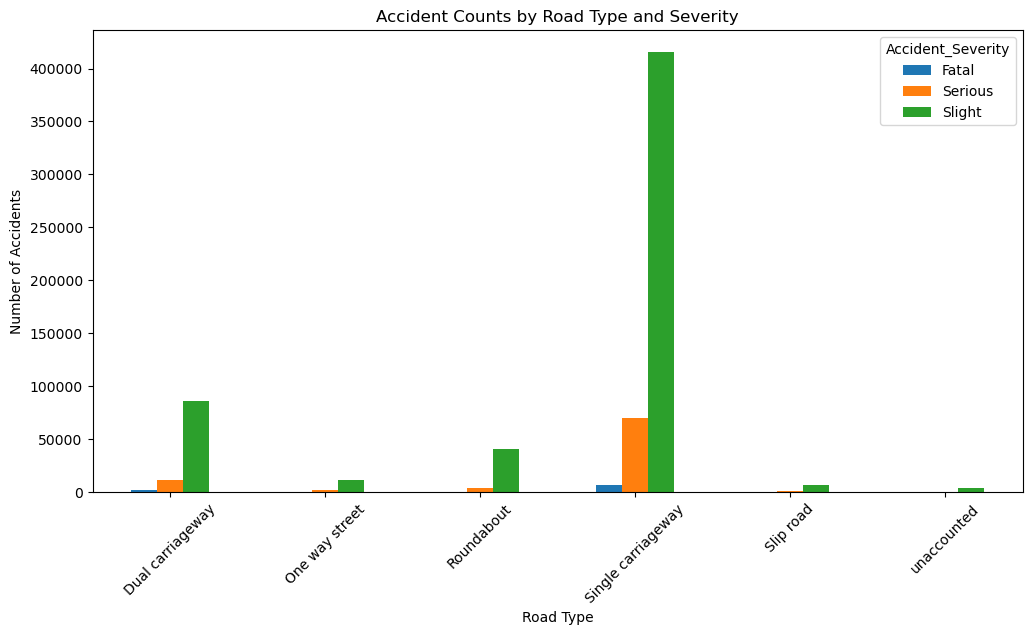

In [40]:
road_severity.plot(kind="bar", figsize=(12,6))
plt.title("Accident Counts by Road Type and Severity")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


<h2>Insight 18: Single carriageways account for the highest number of accidents overall, with slight accidents (415,557) dominating, followed by serious (70,059) and fatal (6,527).</h2>

<h2>Insight 19: In contrast, road types like slip roads and one-way streets show significantly fewer accidents.</h2>

In [41]:
accident['District_Area'].unique()

['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames', 'Hammersmith and Fulham', 'Hounslow', ..., 'County Durham', 'Shropshire', 'Central Bedfordshire', 'Cornwall', 'Wiltshire']
Length: 422
Categories (422, object): ['Aberdeen City', 'Aberdeenshire', 'Adur', 'Allerdale', ..., 'Wycombe', 'Wyre', 'Wyre Forest', 'York']

<h1>12. In 2021, how many fatal accidents happened in Shropshire? </h1>

In [42]:
shro = accident['District_Area'] ==  'Shropshire'
fatal_acc = accident['Accident_Severity'] == 'Fatal'
year_2021 = accident['Year'] == 2021

In [43]:
shro_21 = (year_2021 & fatal_acc & shro).sum()
shro_21

np.int64(20)

<h2>Insight 20: In 2021, there were 20 fatal accidents recorded in the District of Shropshire,</h2>

<h1>13. Comparing the Total accidents in rural and urban areas by year (2019–2022)</h1>

In [44]:
acc_2019=accident[accident['Year'] == 2019]['Urban_or_Rural_Area'].value_counts()
acc_2019

Urban_or_Rural_Area
Urban          114552
Rural           67558
Unallocated         5
Name: count, dtype: int64

In [45]:
acc_2020=accident[accident['Year'] == 2020]['Urban_or_Rural_Area'].value_counts()
acc_2020

Urban_or_Rural_Area
Urban          108594
Rural           61991
Unallocated         6
Name: count, dtype: int64

In [46]:
acc_2021=accident[accident['Year'] == 2021]['Urban_or_Rural_Area'].value_counts()
acc_2021

Urban_or_Rural_Area
Urban          104538
Rural           59016
Unallocated         0
Name: count, dtype: int64

In [47]:
acc_2022=accident[accident['Year'] == 2022]['Urban_or_Rural_Area'].value_counts()
acc_2022

Urban_or_Rural_Area
Urban          93994
Rural          50425
Unallocated        0
Name: count, dtype: int64

<h2>Insight 21: The year 2019 recorded the highest number of accidents in both rural and urban areas, and the year 2022 holds the lowest recorded accidents</h2>

<h1>14. Did the number of accidents in rural and urban areas decrease from 2019 to 2022?</h1>

In [48]:
accident_summary = accident.groupby(["Year", "Urban_or_Rural_Area"]).size().unstack()
accident_summary

C:\Users\Ria\AppData\Local\Temp\ipykernel_8688\4204906694.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_summary = accident.groupby(["Year", "Urban_or_Rural_Area"]).size().unstack()


Urban_or_Rural_Area,Rural,Unallocated,Urban
Year,,,
2019,67558,5,114552
2020,61991,6,108594
2021,59016,0,104538
2022,50425,0,93994


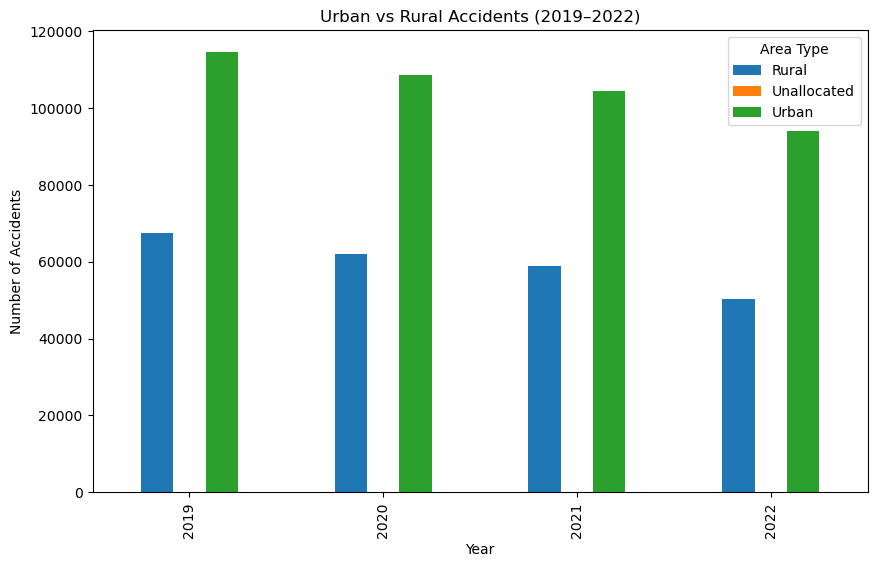

In [49]:
accident_summary.plot(kind="bar", figsize=(10,6))
plt.title("Urban vs Rural Accidents (2019–2022)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend(title="Area Type")
plt.show()

<h1>Insight 22: Accident counts in both rural and urban areas show a consistent decrease from 2019 to 2022.</h1>

<h1>15. Frequent latitude and longitude throughout the years.</h1>

In [50]:
#latritude
top_latitudes = accident["Latitude"].value_counts()
top_latitudes

Latitude
52.458798    75
52.949719    45
53.083165    33
52.967634    31
52.938860    29
             ..
60.648412     1
60.665748     1
60.668921     1
60.714772     1
50.022208     1
Name: count, Length: 511618, dtype: int64

In [51]:
# checking
top_lat = accident["Latitude"].mode()[0]
top_lat

np.float64(52.458798)

<h2>Insight 23: The most frequent accident latitude is 52.458798 with 75 occurrences.</h2>

In [52]:
#longitude
top_longitudes = accident["Longitude"].value_counts()
top_longitudes

Longitude
-0.977611    71
-1.871043    36
-0.816789    33
-1.190861    31
-1.216694    29
             ..
 1.755230     1
 1.755279     1
 1.755417     1
 1.755432     1
 1.755455     1
Name: count, Length: 529766, dtype: int64

In [53]:
# checking
top_lon = accident["Longitude"].mode()[0]
top_lon

np.float64(-0.977611)

<h2>Insight 24: The most frequent accident longitude is -0.977611 with 71 occurrences.</h2>

<h1>16. How many accidents involved more than 10 vehicles?</h1>

In [54]:
ten = (accident["Number_of_Vehicles"] > 10).sum()
ten


np.int64(42)

<h2>Insight 25: A total of 42 accidents involved more than 10 vehicles</h2>

<h1>17. Number of vehicles invloved in accidents</h1>

In [55]:
vehicle_counts = accident["Number_of_Vehicles"].value_counts()
vehicle_counts

Number_of_Vehicles
2     391995
1     200787
3      52806
4      11300
5       2464
6        758
7        296
8        147
9         57
10        27
11        12
14         9
12         7
13         6
16         4
28         1
15         1
32         1
19         1
Name: count, dtype: int64

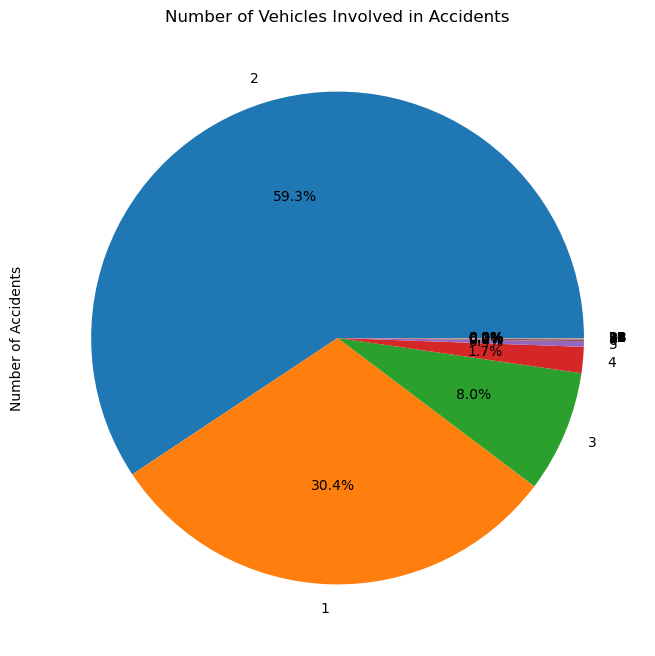

In [56]:
plt.figure(figsize=(8,8))
vehicle_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Number of Vehicles Involved in Accidents")
plt.ylabel("Number of Accidents")  
plt.show()


<h2>Insight 26: Most accidents involve 2 vehicles (59.3%), followed by single-vehicle accidents (30.4%).</h2>

In [57]:
# Get all unique values as a list
districts = accident['District_Area'].unique().tolist()

# Show them all
print(districts)


['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames', 'Hammersmith and Fulham', 'Hounslow', 'Tower Hamlets', 'City of London', 'Southwark', 'Camden', 'Hackney', 'Islington', 'Barnet', 'Brent', 'Haringey', 'Merton', 'Ealing', 'Enfield', 'Greenwich', 'Newham', 'London Airport (Heathrow)', 'Hillingdon', 'Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Bromley', 'Havering', 'Croydon', 'Lambeth', 'Wandsworth', 'Sutton', 'Bexley', 'Lewisham', 'Harrow', 'Kingston upon Thames', 'Barrow-in-Furness', 'South Lakeland', 'Carlisle', 'Eden', 'Allerdale', 'Copeland', 'Fylde', 'Blackpool', 'Wyre', 'Lancaster', 'Chorley', 'West Lancashire', 'South Ribble', 'Preston', 'Blackburn with Darwen', 'Hyndburn', 'Ribble Valley', 'Burnley', 'Pendle', 'Rossendale', 'Wirral', 'Liverpool', 'Sefton', 'Knowsley', 'St. Helens', 'Manchester', 'Salford', 'Tameside', 'Stockport', 'Bolton', 'Wigan', 'Trafford', 'Bury', 'Rochdale', 'Oldham', 'Chester', 'Vale Royal', 'Halton', 'Warrington', 'Crewe and ntw

In [58]:
accident['District_Area'].unique()

['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames', 'Hammersmith and Fulham', 'Hounslow', ..., 'County Durham', 'Shropshire', 'Central Bedfordshire', 'Cornwall', 'Wiltshire']
Length: 422
Categories (422, object): ['Aberdeen City', 'Aberdeenshire', 'Adur', 'Allerdale', ..., 'Wycombe', 'Wyre', 'Wyre Forest', 'York']

<h1>Data Visualization to Six District with Heatmap</h1>

<hr>
<h1 align = 'center' ><b>Birmingham Analysis</h1></b>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Birmingham_cityscape_view_2010.jpg/1200px-Birmingham_cityscape_view_2010.jpg' />


<h2 align='center'>Yearly Accidents in Birmingham District from 2019-2022</h2>

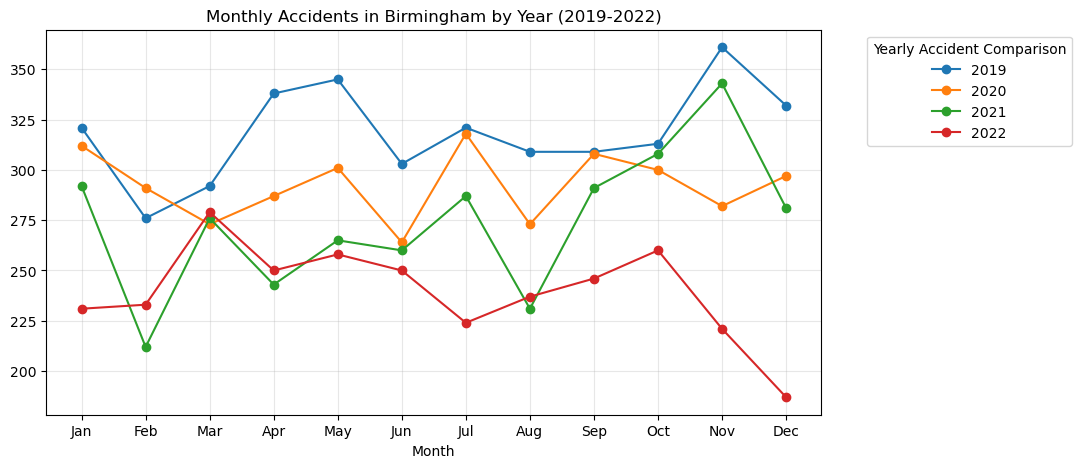

In [90]:
#yearly accidents in birminghan from 2019-2022
birmingham = accident[accident['District_Area'] == 'Birmingham']

monthly_birminghamdata = birmingham.groupby(['Year', 'Month']).size()
monthly_birminghamdata = monthly_birminghamdata.unstack(level=0)

monthly_birminghamdata.plot(marker='o', figsize=(10, 5), title='Monthly Accidents in Birmingham by Year (2019-2022)')

plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()


<h1 align='center'>Visualization of Yearly, Monthly, and Weekly Accidents of Birmingham</h1>

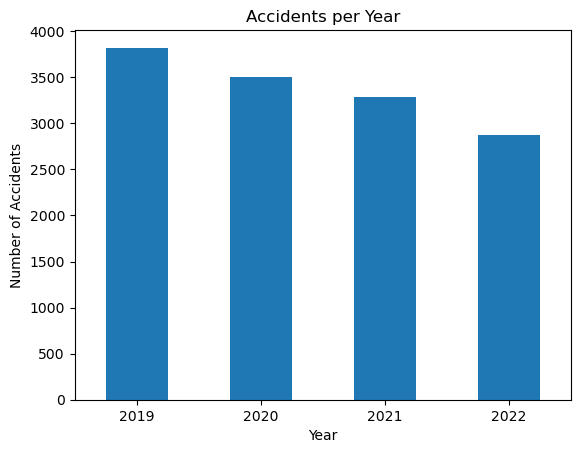

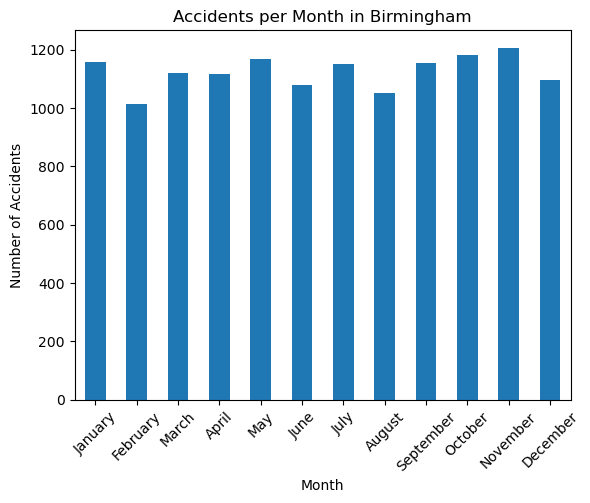

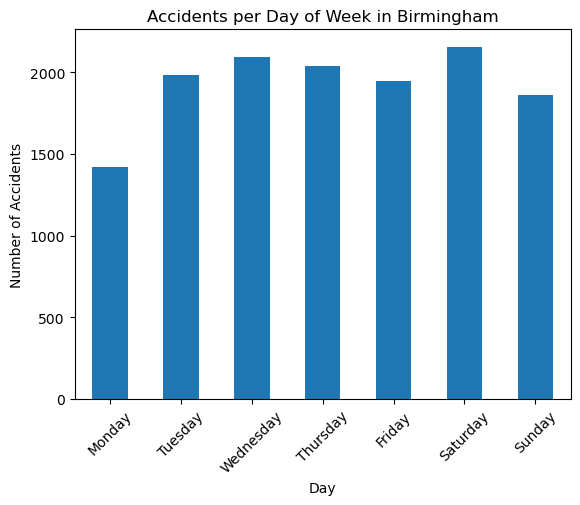

In [89]:
# Accidents per year
accidents_per_year = birmingham['Year'].value_counts().sort_index()
accidents_per_month = birmingham['Month'].value_counts().sort_index()
accidents_per_day = birmingham['DayofWeek'].value_counts().sort_index()

#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

#Accidents per month
accidents_per_month = birmingham['Month'].value_counts().sort_index()

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April',5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Replace numerical months with names
accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month in Birmingham')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

#perday
accidents_per_day = birmingham['DayofWeek'].value_counts().sort_index()

day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

accidents_per_day.index = accidents_per_day.index.map(day_names)

accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day of Week in Birmingham')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<h1 align ='center'>Birmingham Accidents per Month Considering Severity</h1>

C:\Users\Ria\AppData\Local\Temp\ipykernel_8688\3494470157.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidents_per_month_severity = (birmingham.groupby(['Month', 'Accident_Severity']).size().unstack())


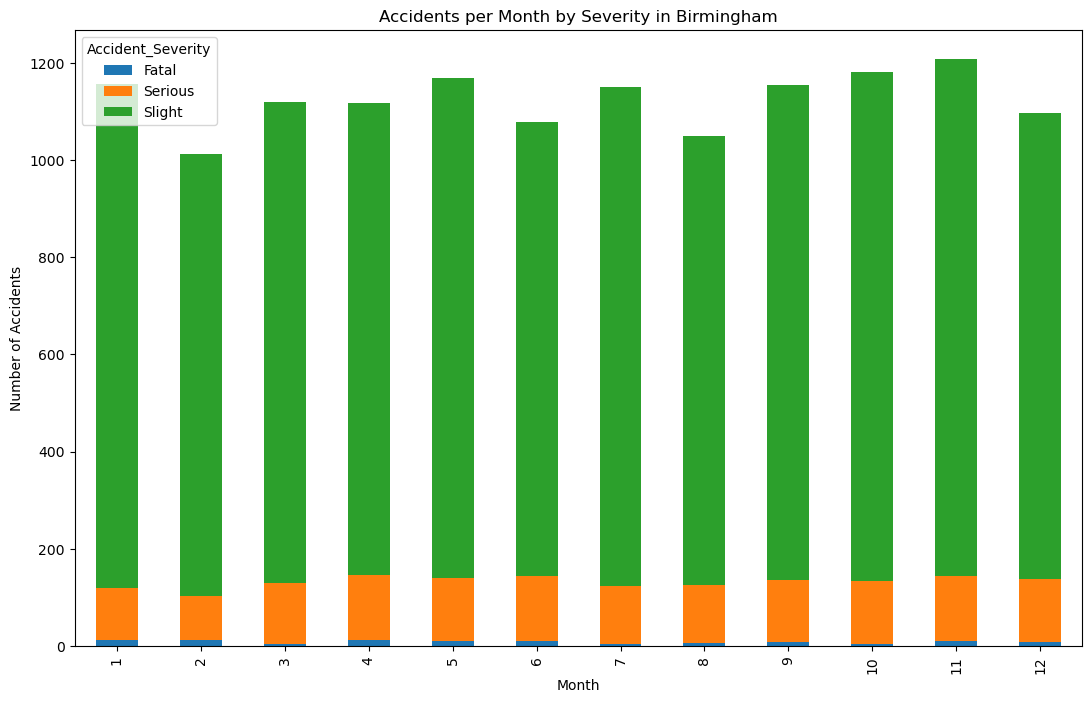

In [66]:
birmingham = accident[accident['District_Area'] == 'Birmingham']

#per month
accidents_per_month_severity = (birmingham.groupby(['Month', 'Accident_Severity']).size().unstack())

accidents_per_month_severity.plot(kind='bar', stacked=True)
plt.title('Accidents per Month by Severity in Birmingham')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13, 8)
plt.show()


<h1 align='center'>Birmingham Accidents per Month by Weather Conditions</h1>

C:\Users\Ria\AppData\Local\Temp\ipykernel_8688\836983284.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  accidents_by_month_weather = birmingham.pivot_table(index='Month', columns='Weather_Conditions',values='Index',aggfunc='count')


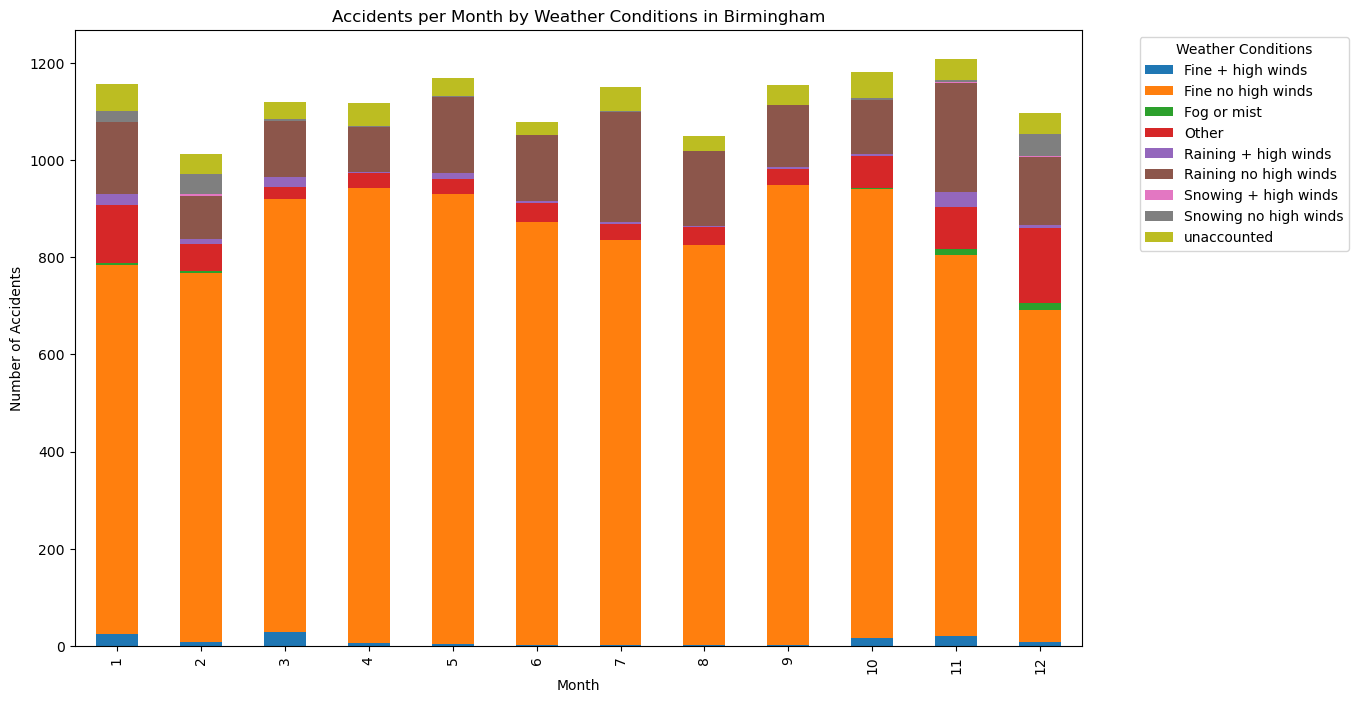

In [79]:
accidents_by_month_weather = birmingham.pivot_table(index='Month', columns='Weather_Conditions',values='Index',aggfunc='count')

accidents_by_month_weather.plot(kind='bar', stacked=True)
plt.title('Accidents per Month by Weather Conditions in Birmingham')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gcf().set_size_inches(13, 8)
plt.show()


<h1 align = 'center'>Accident Severity in Birminghan</h1>

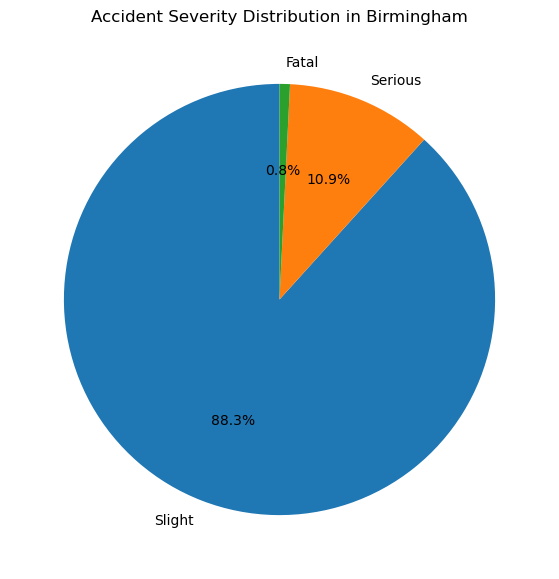

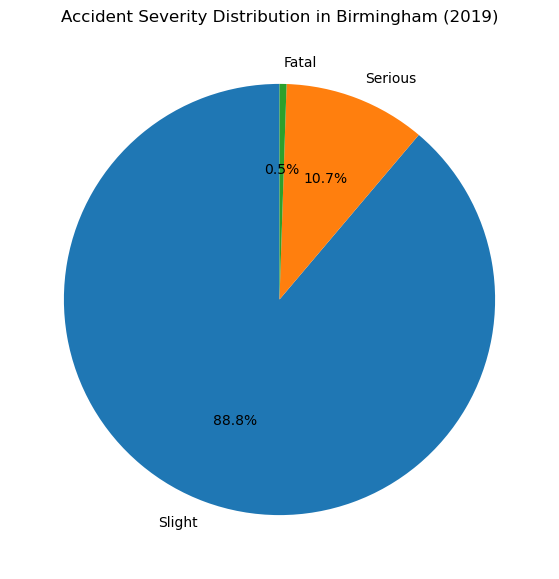

In [87]:

severity_birmingham = birmingham['Accident_Severity'].value_counts()

plt.pie(severity_birmingham,labels=severity_birmingham.index,autopct='%1.1f%%',startangle=90)
plt.gcf().set_size_inches(10, 7)
plt.title('Accident Severity Distribution in Birmingham')
plt.show()

#2019
severity_2019_birmingham = birmingham[birmingham['Year'] == 2019]
bsc_2019 = severity_2019_birmingham['Accident_Severity'].value_counts()

plt.pie(bsc_2019,labels=bsc_2019.index,autopct='%1.1f%%',startangle=90)
plt.gcf().set_size_inches(10, 7)
plt.title('Accident Severity Distribution in Birmingham (2019)')
plt.show()


<h1> <b>Birminghan District Insight:</b> 


<hr>
<h1 align = 'center' ><b>Cambridge Analysis</h1></b>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Cambridge_-_Kings_College_vue_des_backs.jpg/1200px-Cambridge_-_Kings_College_vue_des_backs.jpg' />


<h1 align='center'>Yearly Accidents in Cambridge District from 2019-2022</h1>

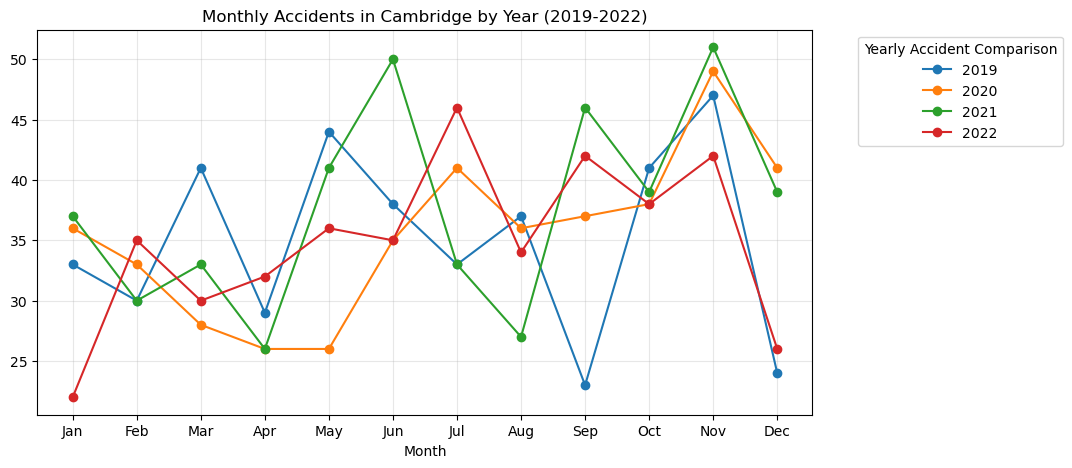

In [81]:
cambridge = accident[accident['District_Area'] == 'Cambridge']

monthly_cambridgedata = cambridge.groupby(['Year', 'Month']).size()
monthly_cambridgedata = monthly_cambridgedata.unstack(level=0)

monthly_cambridgedata.plot(marker='o', figsize=(10, 5),title='Monthly Accidents in Cambridge by Year (2019-2022)')

plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()


<h1 align='center'>Visualization of Yearly, Monthly, and Weekly Accidents of Cambridge</h1>

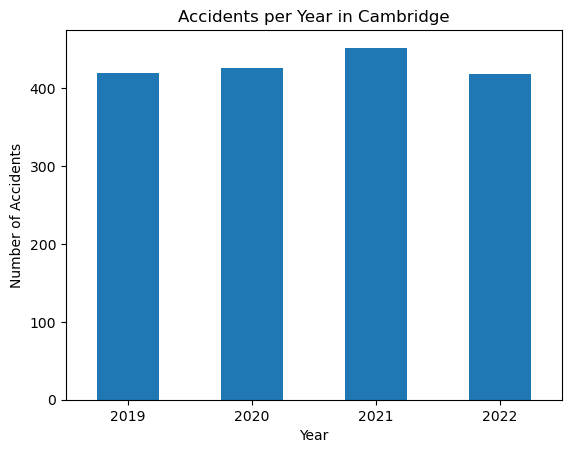

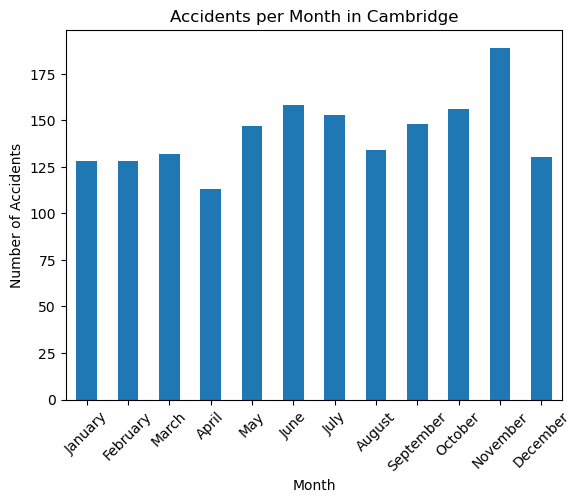

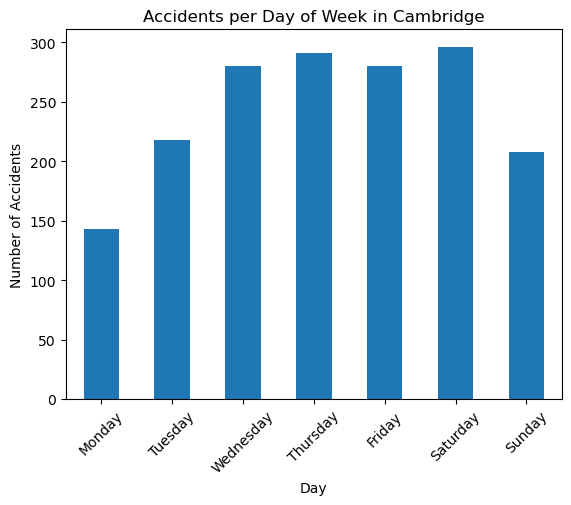

In [82]:
# Filter only Cambridge
cambridge = accident[accident['District_Area'] == 'Cambridge']

#Accidents per year
accidents_per_year = cambridge['Year'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year in Cambridge')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

#Accidents per month
accidents_per_month = cambridge['Month'].value_counts().sort_index()

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April',5: 'May', 6: 'June', 7: 'July', 8: 'August',
               9: 'September', 10: 'October', 11: 'November', 12: 'December'}

#Replace numerical months with names
accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month in Cambridge')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

#Accidents per day of week
accidents_per_day = cambridge['DayofWeek'].value_counts().sort_index()

day_names = { 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

accidents_per_day.index = accidents_per_day.index.map(day_names)

accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day of Week in Cambridge')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


<h1 align ='center'>Cambridge Accidents per Month Considering Severity</h1>

C:\Users\Ria\AppData\Local\Temp\ipykernel_8688\1326285273.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cambridge.groupby(['Month', 'Accident_Severity']).size().unstack()


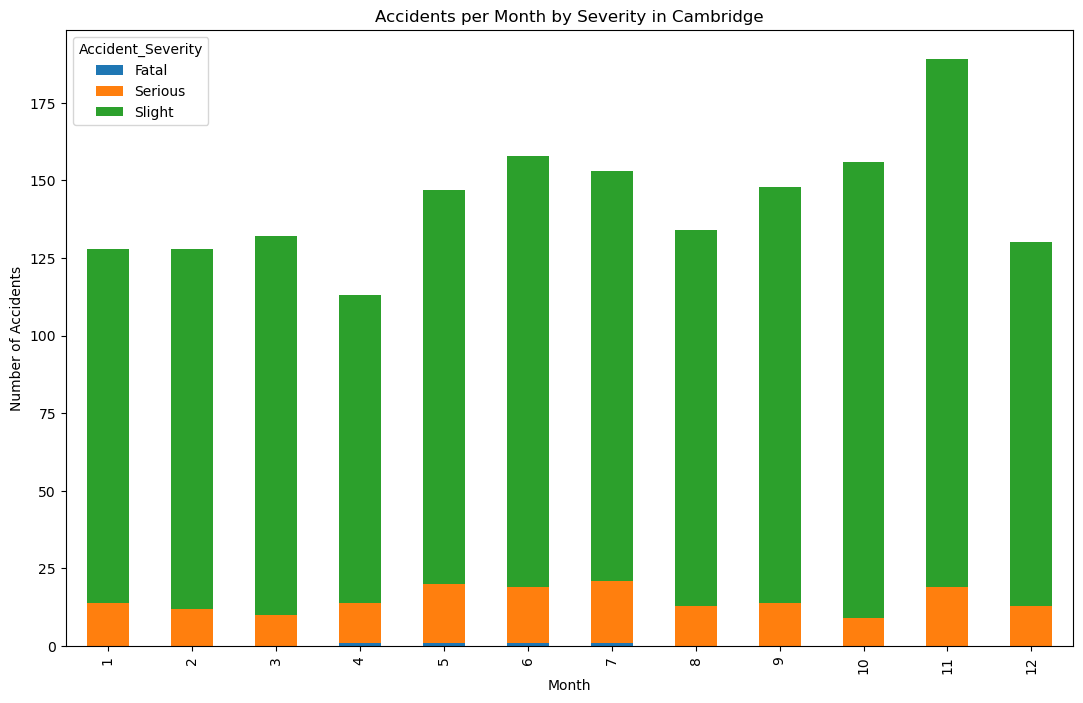

In [83]:
cambridge = accident[accident['District_Area'] == 'Cambridge']

# Per month by severity
accidents_per_month_severity = (
    cambridge.groupby(['Month', 'Accident_Severity']).size().unstack()
)

accidents_per_month_severity.plot(kind='bar', stacked=True)
plt.title('Accidents per Month by Severity in Cambridge')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13, 8)
plt.show()


<h1 align='center'>Cambridge Accidents per Month by Weather Conditions</h1>

C:\Users\Ria\AppData\Local\Temp\ipykernel_8688\1451475533.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  accidents_by_month_weather = cambridge.pivot_table( index='Month', columns='Weather_Conditions', values='Index', aggfunc='count')


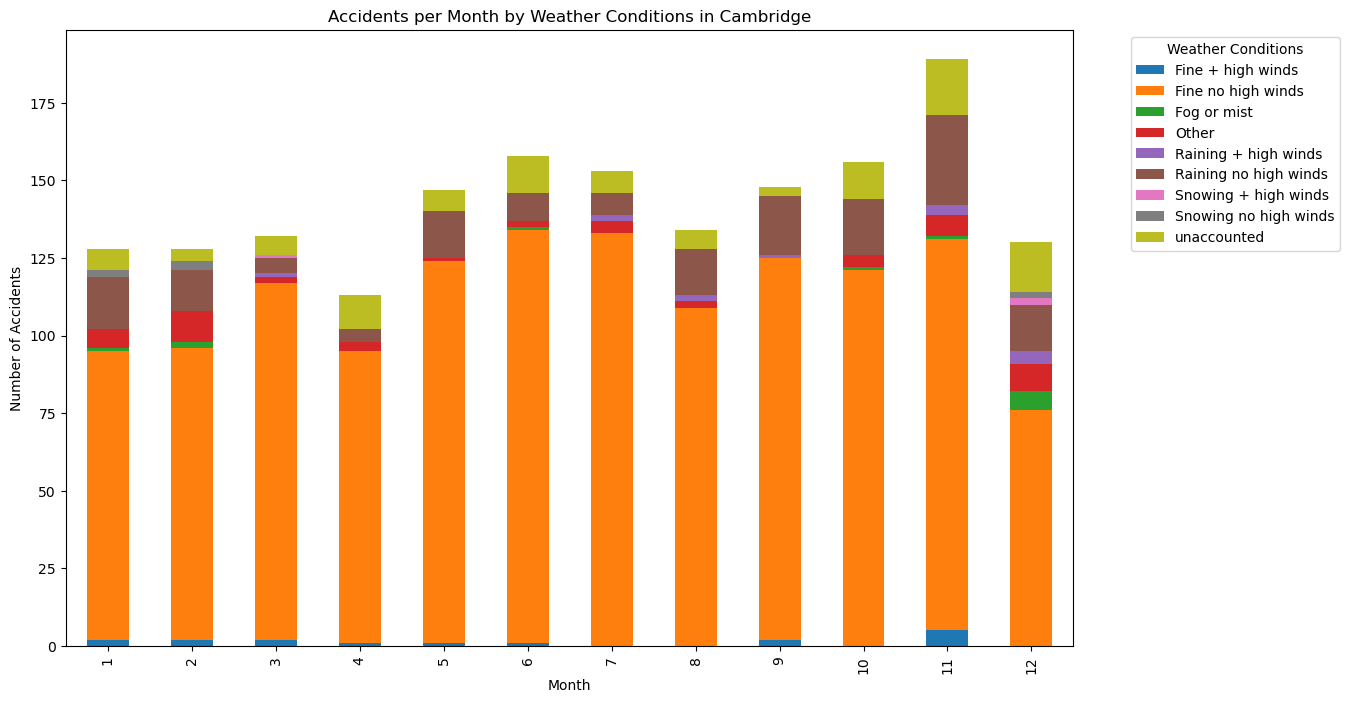

In [94]:
cambridge = accident[accident['District_Area'] == 'Cambridge']

accidents_by_month_weather = cambridge.pivot_table( index='Month', columns='Weather_Conditions', values='Index', aggfunc='count')

accidents_by_month_weather.plot(kind='bar', stacked=True)
plt.title('Accidents per Month by Weather Conditions in Cambridge')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gcf().set_size_inches(13, 8)
plt.show()


<h1 align = 'center'>Accident Severity in Cambridge</h1>

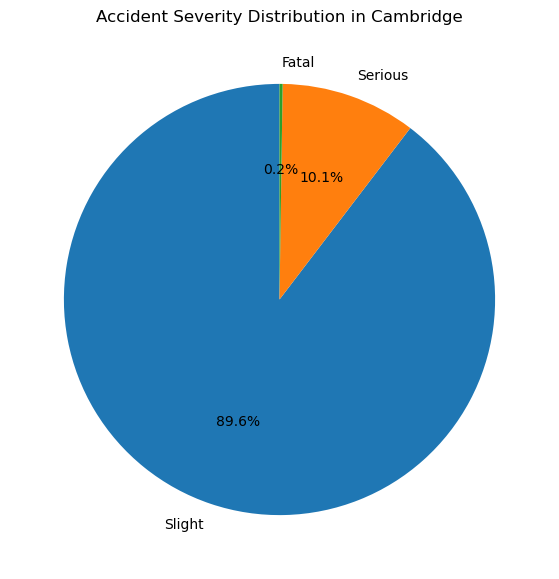

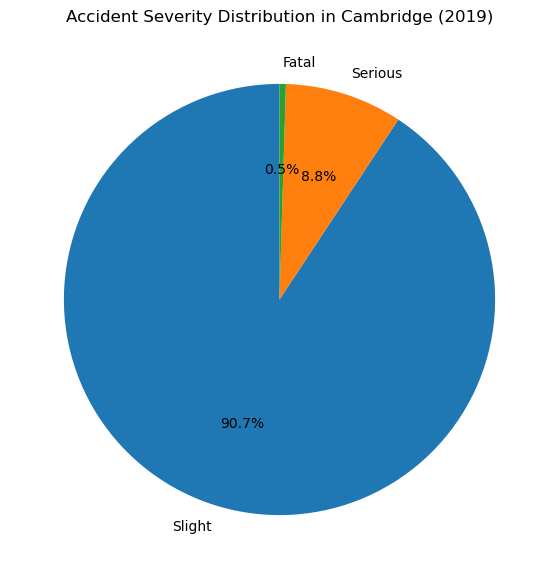

In [88]:
severity_cambridge = cambridge['Accident_Severity'].value_counts()

plt.pie(severity_cambridge,labels=severity_cambridge.index,autopct='%1.1f%%',startangle=90)
plt.gcf().set_size_inches(10, 7)
plt.title('Accident Severity Distribution in Cambridge')
plt.show()

# 2019 only
severity_2019_cambridge = cambridge[cambridge['Year'] == 2019]
csc_2019 = severity_2019_cambridge['Accident_Severity'].value_counts()

plt.pie(csc_2019,labels=csc_2019.index,autopct='%1.1f%%',startangle=90)
plt.gcf().set_size_inches(10, 7)
plt.title('Accident Severity Distribution in Cambridge (2019)')
plt.show()


<h1> <b>Cambridge District Insight:</b> 


<hr>
<h1 align = 'center' ><b>Torfaen Analysis</h1></b>
<img src='https://www.torfaen.gov.uk/Images/SplashImages/Ironworks-1.jpg' />


<h1 align='center'>Yearly Accidents in Torfaen District from 2019-2022</h1>

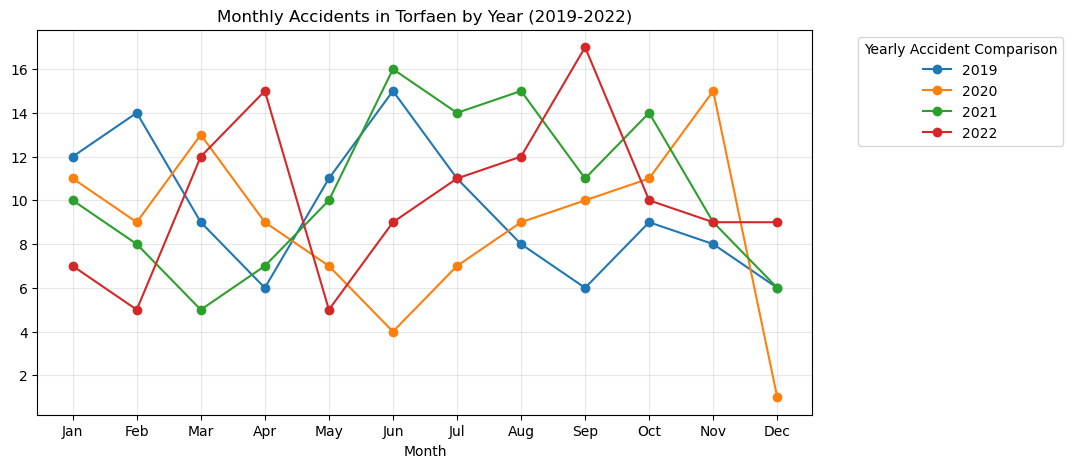

In [91]:
torfaen = accident[accident['District_Area'] == 'Torfaen']

monthly_torfaendata = torfaen.groupby(['Year', 'Month']).size()
monthly_torfaendata = monthly_torfaendata.unstack(level=0)

monthly_torfaendata.plot(marker='o',figsize=(10, 5),title='Monthly Accidents in Torfaen by Year (2019-2022)')

plt.xticks( range(1, 13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()


<h1 align='center'>Visualization of Yearly, Monthly, and Weekly Accidents of Torfaen</h1>

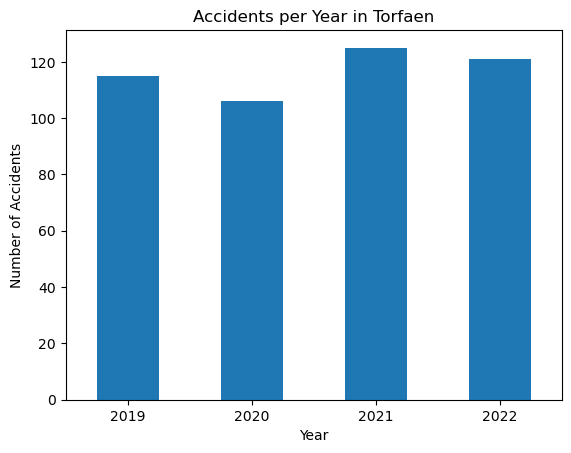

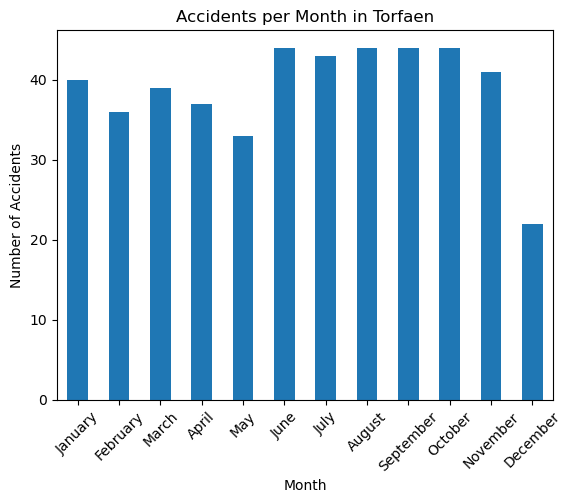

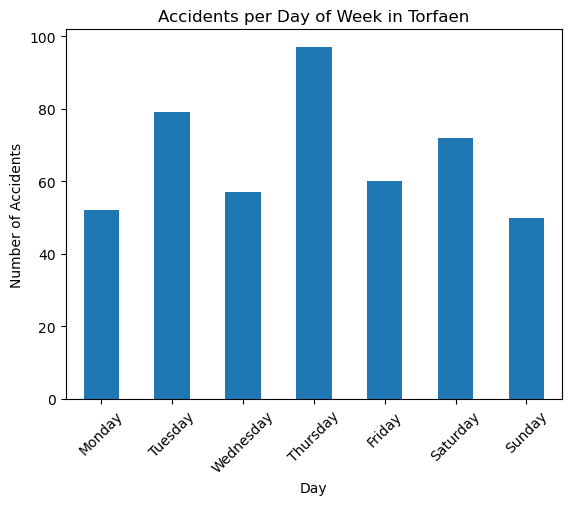

In [92]:
# Filter only Torfaen
torfaen = accident[accident['District_Area'] == 'Torfaen']

# Accidents per year
accidents_per_year = torfaen['Year'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year in Torfaen')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

# Accidents per month
accidents_per_month = torfaen['Month'].value_counts().sort_index()

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April',5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Replace numerical months with names
accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month in Torfaen')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Accidents per day of week
accidents_per_day = torfaen['DayofWeek'].value_counts().sort_index()
day_names = { 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

accidents_per_day.index = accidents_per_day.index.map(day_names)

accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day of Week in Torfaen')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


<h1 align ='center'>Torafen Accidents per Month Considering Severity</h1>

C:\Users\Ria\AppData\Local\Temp\ipykernel_8688\4147541560.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidents_per_month_severity = ( torfaen.groupby(['Month', 'Accident_Severity']).size().unstack())


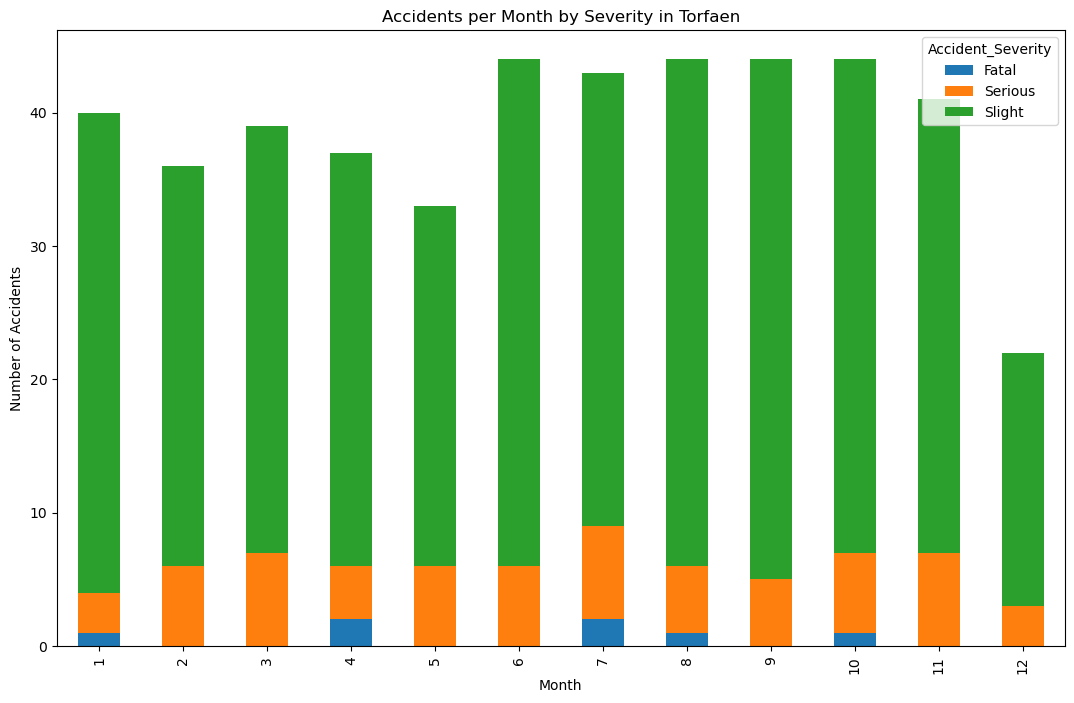

In [93]:
# Filter only Torfaen
torfaen = accident[accident['District_Area'] == 'Torfaen']

# Per month by severity
accidents_per_month_severity = ( torfaen.groupby(['Month', 'Accident_Severity']).size().unstack())

accidents_per_month_severity.plot(kind='bar', stacked=True)
plt.title('Accidents per Month by Severity in Torfaen')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13, 8)
plt.show()


<h1 align='center'>Torfaen Accidents per Month by Weather Conditions</h1>

C:\Users\Ria\AppData\Local\Temp\ipykernel_8688\2042006190.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  accidents_by_month_weather = torfaen.pivot_table(index='Month',columns='Weather_Conditions',values='Index',aggfunc='count')


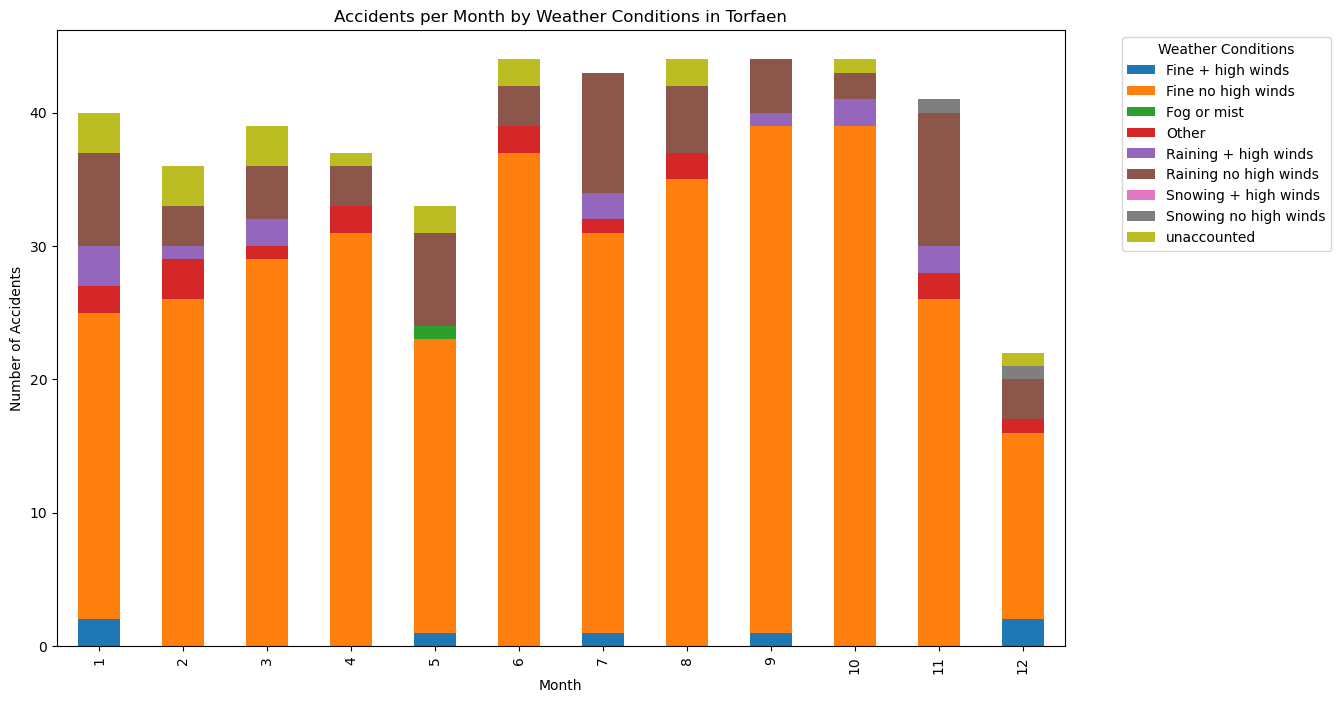

In [95]:
# Filter only Torfaen
torfaen = accident[accident['District_Area'] == 'Torfaen']

# Pivot table for accidents by month and weather conditions
accidents_by_month_weather = torfaen.pivot_table(index='Month',columns='Weather_Conditions',values='Index',aggfunc='count')

accidents_by_month_weather.plot(kind='bar', stacked=True)
plt.title('Accidents per Month by Weather Conditions in Torfaen')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gcf().set_size_inches(13, 8)
plt.show()


<h1 align = 'center'>Accident Severity in Torfaen</h1>

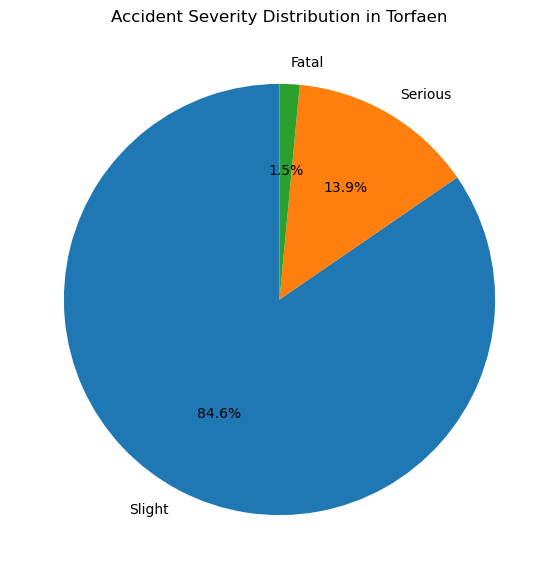

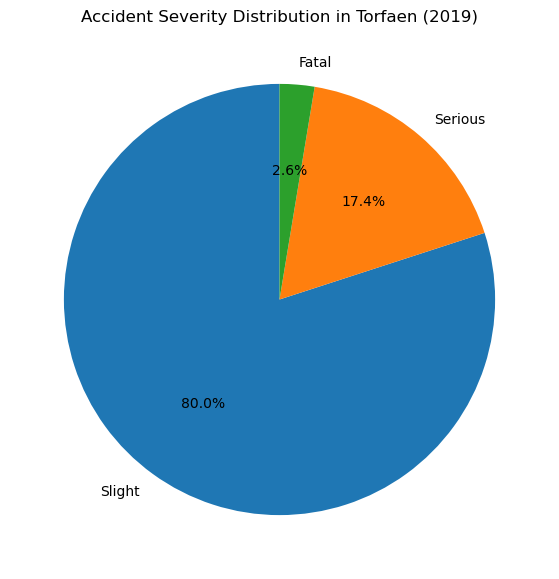

In [96]:
# Filter only Torfaen
torfaen = accident[accident['District_Area'] == 'Torfaen']

# Overall severity distribution
severity_torfaen = torfaen['Accident_Severity'].value_counts()

plt.pie(severity_torfaen,labels=severity_torfaen.index,autopct='%1.1f%%',startangle=90)
plt.gcf().set_size_inches(10, 7)
plt.title('Accident Severity Distribution in Torfaen')
plt.show()

# 2019 only
severity_2019_torfaen = torfaen[torfaen['Year'] == 2019]
tsc_2019 = severity_2019_torfaen['Accident_Severity'].value_counts()

plt.pie(tsc_2019,labels=tsc_2019.index,autopct='%1.1f%%',startangle=90)
plt.gcf().set_size_inches(10, 7)
plt.title('Accident Severity Distribution in Torfaen (2019)')
plt.show()


<h1> <b>Torfaen District Insight:</b> 
